In [160]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

## Importing and checking data

In [5]:
profile = pd.read_csv("profiles.csv")
pd.set_option('display.max_columns', None)
profile.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [13]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [9]:
profile["job"].value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [10]:
profile["diet"].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [12]:
profile["drugs"].value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

## Making some visualizations of the data

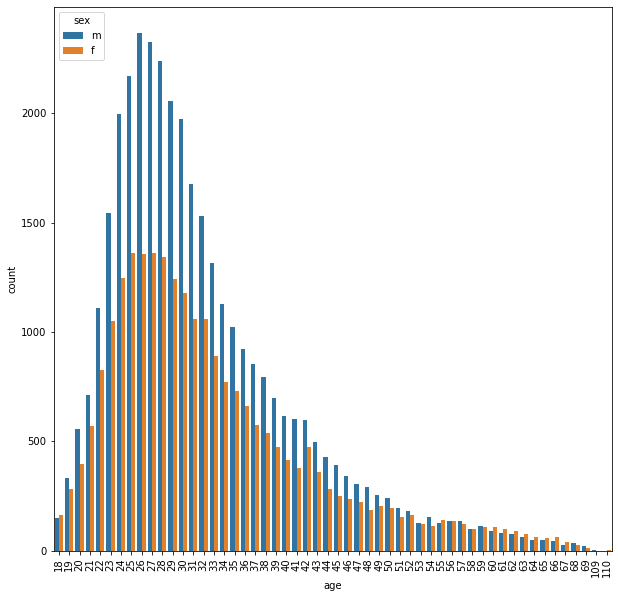

In [29]:
plt.subplots(figsize=(10,10))
sns.countplot(x= "age", data = profile, hue = "sex")
plt.xticks(rotation = 90)
plt.show()

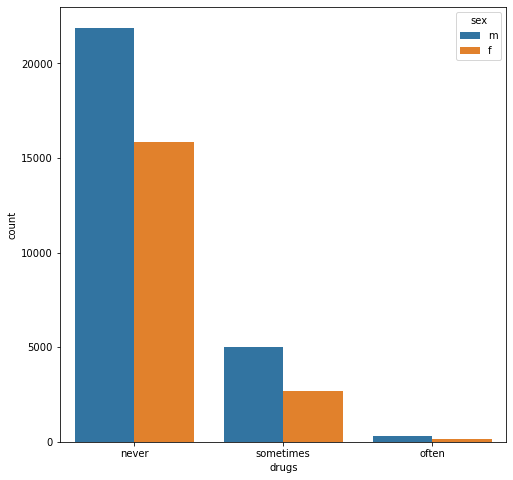

In [33]:
plt.subplots(figsize=(8,8))
sns.countplot(x="drugs", data = profile, hue = "sex")
plt.show()

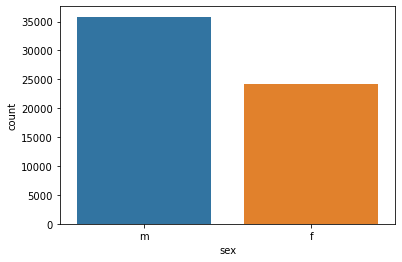

In [35]:
sns.countplot(x="sex", data = profile)
plt.show()

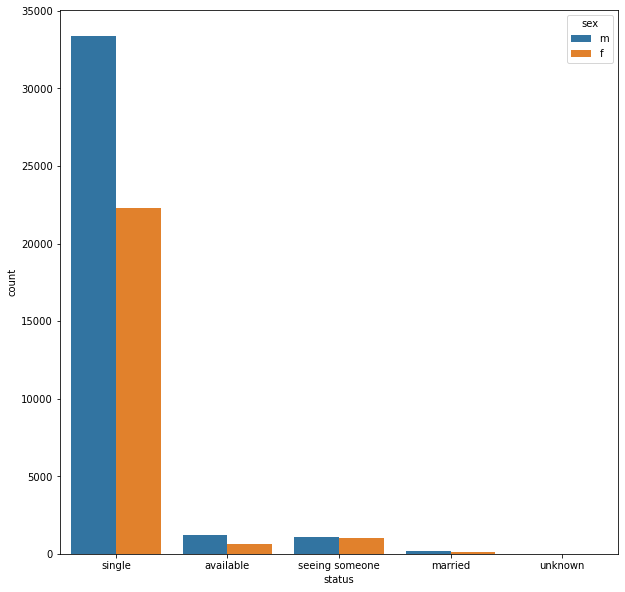

In [37]:
plt.subplots(figsize=(10,10))
sns.countplot(x="status", data = profile, hue = "sex")
plt.show()

## Formulating a question
Investigating the **The Zodiac signs** and making predictions based on informations on their profiles. I will be using **drinking, smoking, drugs, and essays** as features to make this predictions.

## Augmentation of the data and cleaning.

In [46]:
profile["zodiac"] = profile["sign"].str.split(" ").str.get(0)

In [48]:
profile["zodiac"].value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: zodiac, dtype: int64

In [52]:
profile["smokes"].value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [54]:
profile["drinks"].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [56]:
profile["drugs"].value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [59]:
profile["smoke_code"] =profile["smokes"].dropna().map({"yes":0, "no":1,"sometimes":2, "when drinking":3, "trying to quit":4}) 

In [60]:
profile["drinks_code"] = profile["drinks"].dropna().map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})

In [61]:
profile["drugs_code"] = profile["drugs"].dropna().map({"never":0, "sometimes":1, "often":2})

In [62]:
profile.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'zodiac',
       'smoke_code', 'drinks_code', 'drugs_code'],
      dtype='object')

In [64]:
essay_col = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8', 'essay9']
profile[essay_col] = profile[essay_col].replace(np.nan, "", regex = True)

In [66]:
profile["essay"] = profile[essay_col].apply(lambda x: "".join(x), axis = 1)

In [67]:
profile["essay_len"] = profile["essay"].apply(lambda x: len(x))

In [108]:
new = profile.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7127 entries, 0 to 59944
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7127 non-null   int64  
 1   body_type    7127 non-null   object 
 2   diet         7127 non-null   object 
 3   drinks       7127 non-null   object 
 4   drugs        7127 non-null   object 
 5   education    7127 non-null   object 
 6   essay0       7127 non-null   object 
 7   essay1       7127 non-null   object 
 8   essay2       7127 non-null   object 
 9   essay3       7127 non-null   object 
 10  essay4       7127 non-null   object 
 11  essay5       7127 non-null   object 
 12  essay6       7127 non-null   object 
 13  essay7       7127 non-null   object 
 14  essay8       7127 non-null   object 
 15  essay9       7127 non-null   object 
 16  ethnicity    7127 non-null   object 
 17  height       7127 non-null   float64
 18  income       7127 non-null   int64  
 19  job  

## Normalization of the data

In [109]:
features = new[["smoke_code", "drinks_code", "drugs_code","essay_len"]]

In [110]:
x = features.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled, columns = features.columns).dropna()

In [111]:
features.head()

,smoke_code,drinks_code,drugs_code,essay_len
0,0.50,0.4,0.0,0.027372
1,0.25,0.6,0.5,0.015000
2,0.25,0.4,0.0,0.012787
3,0.25,0.4,0.0,0.027008
4,0.25,0.4,0.0,0.028805


In [113]:
labels = new["zodiac"]
labels.head()

0          gemini
1          cancer
7     sagittarius
14         taurus
19         pisces
Name: zodiac, dtype: object

# Using Classification Techniques to predict

In [91]:
profile["zodiac_code"] = profile["zodiac"].dropna().map({"leo":0, "gemini":1, "libra":2,"cancer":3,"virgo":4,"taurus":5,"scorpio":6,"aries":7,"pisces":8,"sagittarius":9, "aquarius":10, "capricorn":11})

In [93]:
profile["zodiac_code"].unique()

array([ 1.,  3.,  8., 10.,  5.,  4.,  9.,  0., nan,  7.,  2.,  6., 11.])

### Splitting the data into train and test sets

In [156]:
train_data, test_data, train_label, test_label = train_test_split(features, labels, train_size=0.8, test_size=0.2, random_state =1)

## KNN Classification Algorithmn

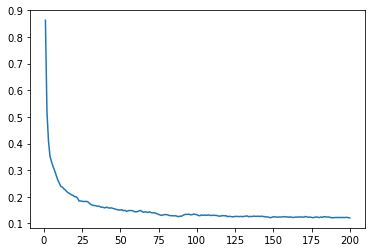

In [154]:
k_value = []
for i in range(1, 201):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(train_data, train_label)
    k_value.append(classifier.score(train_data, train_label))
plt.plot(range(1,201), k_value)
plt.show()

In [157]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_label)
y_prediction = classifier.predict(train_data)
classifier.score(train_data, train_label)

0.3316961936502368

In [159]:
print(classification_report(train_label,y_prediction))

              precision    recall  f1-score   support

    aquarius       0.25      0.66      0.36       417
       aries       0.28      0.55      0.37       470
      cancer       0.29      0.41      0.34       526
   capricorn       0.28      0.26      0.27       423
      gemini       0.35      0.31      0.33       533
         leo       0.41      0.28      0.34       500
       libra       0.38      0.33      0.35       465
      pisces       0.40      0.29      0.33       463
 sagittarius       0.45      0.25      0.32       469
     scorpio       0.42      0.23      0.30       466
      taurus       0.43      0.23      0.30       473
       virgo       0.46      0.22      0.30       496

    accuracy                           0.33      5701
   macro avg       0.37      0.33      0.33      5701
weighted avg       0.37      0.33      0.33      5701



## Support Vector Machine (SVM)

In [170]:
classifier = SVC(kernel ="poly")
classifier.fit(train_data, train_label)
y_predictionSVM = classifier.predict(train_data)
classifier.score(test_data, test_label)

0.09046283309957924

In [171]:
print(classification_report(train_label,y_predictionSVM))

              precision    recall  f1-score   support

    aquarius       0.27      0.01      0.02       417
       aries       0.15      0.02      0.04       470
      cancer       0.13      0.08      0.10       526
   capricorn       0.25      0.00      0.00       423
      gemini       0.09      0.92      0.17       533
         leo       0.33      0.00      0.01       500
       libra       0.17      0.01      0.02       465
      pisces       0.33      0.00      0.00       463
 sagittarius       0.00      0.00      0.00       469
     scorpio       0.21      0.01      0.02       466
      taurus       0.14      0.02      0.04       473
       virgo       0.33      0.00      0.01       496

    accuracy                           0.10      5701
   macro avg       0.20      0.09      0.04      5701
weighted avg       0.20      0.10      0.04      5701

